In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# let create our own datapoints
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples=1000, n_features=2,n_targets = 1, noise=3.0)

In [4]:
X

array([[ 0.20354271,  0.19404679],
       [ 0.02999374,  0.95119028],
       [ 0.20948796, -0.37033353],
       ...,
       [ 0.62612225, -0.504111  ],
       [-1.43151299, -0.60138897],
       [-1.62930173, -0.431433  ]])

In [5]:
y

array([ 1.52180609e+01,  8.86745722e+01, -3.09524066e+01, -1.18520223e+01,
        6.34327360e+01, -1.30314711e+02, -1.19655270e+02,  1.01271501e+02,
        5.13632606e+01, -1.09343868e+02, -2.45857327e+01,  1.07406016e+01,
        6.86459245e+01, -1.73160886e+02,  5.30829057e+01,  1.32227678e+02,
        9.36554095e+01, -1.97505846e+01,  8.18186503e+01, -7.67734207e+01,
        4.04644515e+01,  5.85055581e+01,  1.18667481e+02,  3.62342490e+00,
       -8.27629807e+00, -1.05735303e+02, -1.00470891e+02, -5.67398886e+01,
       -5.50142898e+01,  1.08252097e+02,  9.26774796e+01, -9.60953449e+01,
       -1.53557018e+01,  9.36705748e+01, -3.15716964e+01,  1.34253819e+02,
        1.09558635e+02, -4.84529575e+01,  7.89789316e+01, -7.24674725e+00,
       -1.09764708e+01, -5.47127882e+01,  7.12196697e+01, -7.15832885e+01,
       -1.38874282e+01, -7.85014519e+01, -1.13152589e+02, -1.05667353e+02,
        1.53542008e+02,  4.00111514e+01,  7.80985992e+01,  1.78830373e+01,
       -2.30924151e+02, -

In [6]:
pd.DataFrame(X)[0]

0      0.203543
1      0.029994
2      0.209488
3      1.695028
4     -0.190017
         ...   
995    0.984639
996    0.033649
997    0.626122
998   -1.431513
999   -1.629302
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

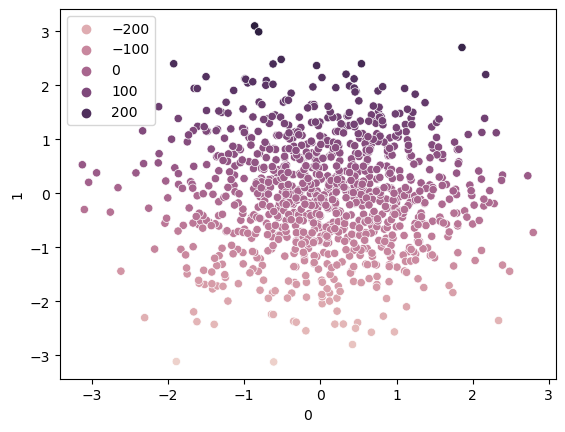

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [8]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr = SVR(kernel='linear')

In [11]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[ 1.40496337, 90.85383085]])

In [13]:
#prediction
y_pred = svr.predict(X_test)

In [14]:
y_pred

array([  25.42174461,  -20.22225944,  -72.58610943,   -4.18336734,
        -98.08156902,  270.22094268,   58.17059251,  -99.93018111,
          3.5233942 ,  -39.77828063,   74.62237372, -189.65619044,
        -79.32669069,   64.21901889,   67.67041431,  137.68701568,
          3.03768986, -160.79800728,   32.64120933,    0.67015434,
        -26.14666818,  112.27522679,  -14.63288221,  -75.69497561,
       -154.51547454,   93.33182352,  -35.74854181,   80.37651363,
        -53.64188256,   76.8308205 ,  -48.8179203 ,  -97.72249054,
         94.5763215 ,  -19.41206917,   75.42563444,  -60.85361085,
        -92.34206587,   95.81334625,  -45.2053423 ,   50.4235713 ,
        171.1719278 ,  194.45537314,   42.39752812, -119.79129886,
        -24.9690223 ,  126.88722549,  -42.06998489,  -57.86898215,
        -47.82432114,   43.66404379,  -55.21597477,   -4.72119838,
        122.12544015,   17.28841957,  147.53731897,   72.10033788,
        116.91719862,  -23.91157026,  126.86463459,  118.87599

In [15]:
from sklearn.metrics import r2_score

In [16]:
score=r2_score(y_pred, y_test)
score

0.9988022854291428

## Hyperparameter

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
# defining the parameters
parameters = {
    'C':[0.1, 1, 10, 100, 1000],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]
}

In [19]:
gridsearch = GridSearchCV(svr, param_grid = parameters, cv=5,refit=True, verbose=3)

In [ ]:
gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.759 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.756 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.758 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.759 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.756 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.758 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

In [ ]:
gridsearch.best_params_

In [ ]:
#prediction
y_pred1 = gridsearch.predict(X_test)

In [ ]:
score=r2_score(y_pred,y_test)
score